# California Housing Price Prediction

#### 1.Load the data

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read the data with all default parameters
housing_df = pd.read_csv('C:\\Datasets\\housing.csv')

In [3]:
#To view first five rows of dataset
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


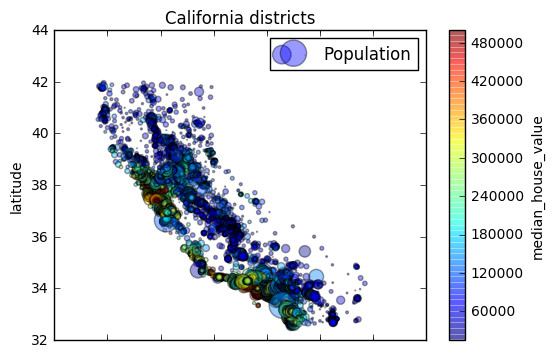

In [4]:
#To plot geographical data

housing_df.plot(kind="scatter", x="longitude", y="latitude", title="California districts", alpha=0.4, 
             s=housing_df["population"]/100, label="Population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar="True")
plt.legend()

We can observe below notes from graph:
- Each circle represent districts and all the districts represent California.
- Radius of each person represent the population of the district.
- Red areas are expesive than blue areas, so we can point that areas next to the ocean are expensive.

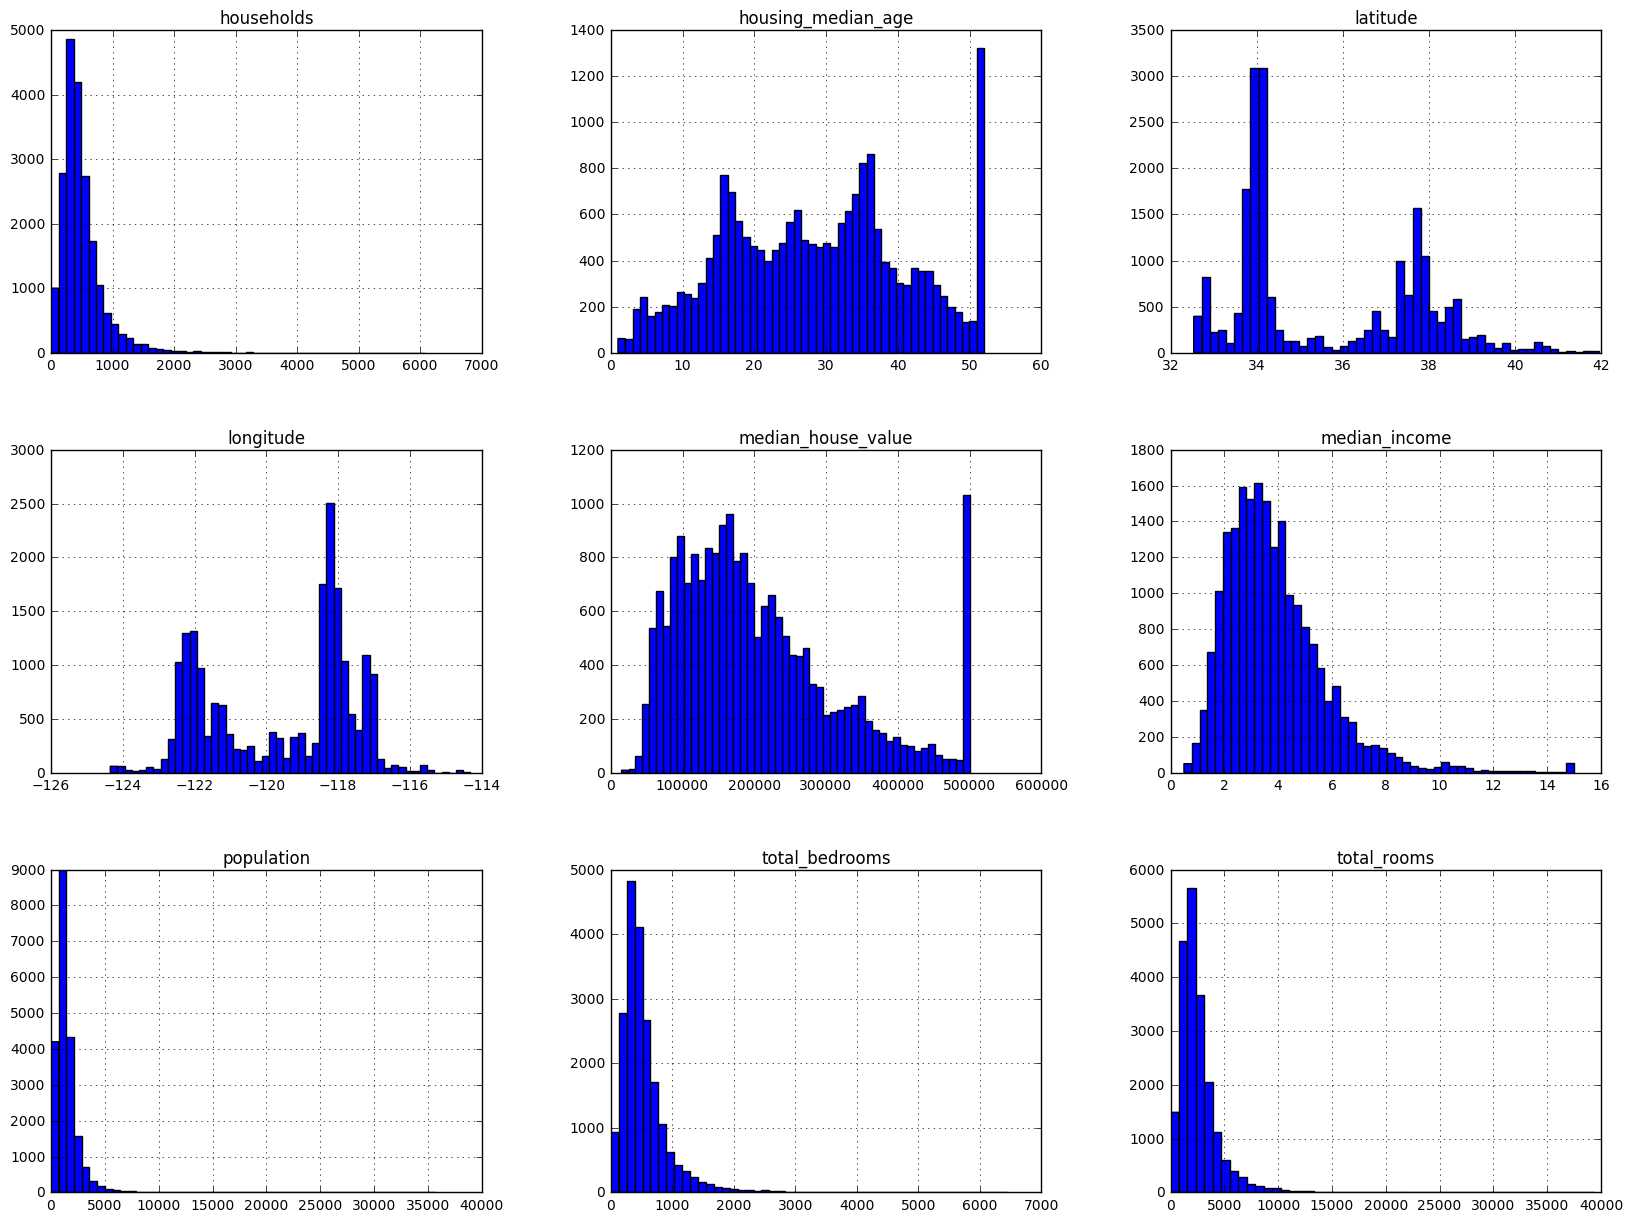

In [5]:
#To visualize housing data distribution
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#Extract input (X) and output (y) data from the dataset.
y = housing_df['median_house_value'].values
X = housing_df.drop('median_house_value',axis=1).values

#### 2.Handle missing values

In [7]:
# To get brief information about the dataframe and to detect missing values of feature(s)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
#To get summary stastics of about housing data
housing_df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,NaN,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,NaN,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,NaN,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#To extract Null value rows of feacture total_bedrooms .
housing_df[housing_df.total_bedrooms.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
738,-122.14,37.67,37,3342,NaN,1635,557,4.7933,NEAR BAY,186900
1097,-121.77,39.66,20,3759,NaN,1705,600,4.7120,INLAND,158600
1350,-121.95,38.03,5,5526,NaN,3207,1012,4.0767,INLAND,143100
1456,-121.98,37.96,22,2987,NaN,1420,540,3.6500,INLAND,204100
1493,-122.01,37.94,23,3741,NaN,1339,499,6.7061,NEAR BAY,322300


In [10]:
#To find mean of total_bedrooms .
bedrooms_mean = housing_df.total_bedrooms.mean()
print(bedrooms_mean)


537.8705525375618


In [11]:
# To impute missing values with mean of total_bedrooms
housing_df.total_bedrooms.fillna(bedrooms_mean, inplace=True)

In [12]:
# check info again to detect missing values of feature(s) 
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


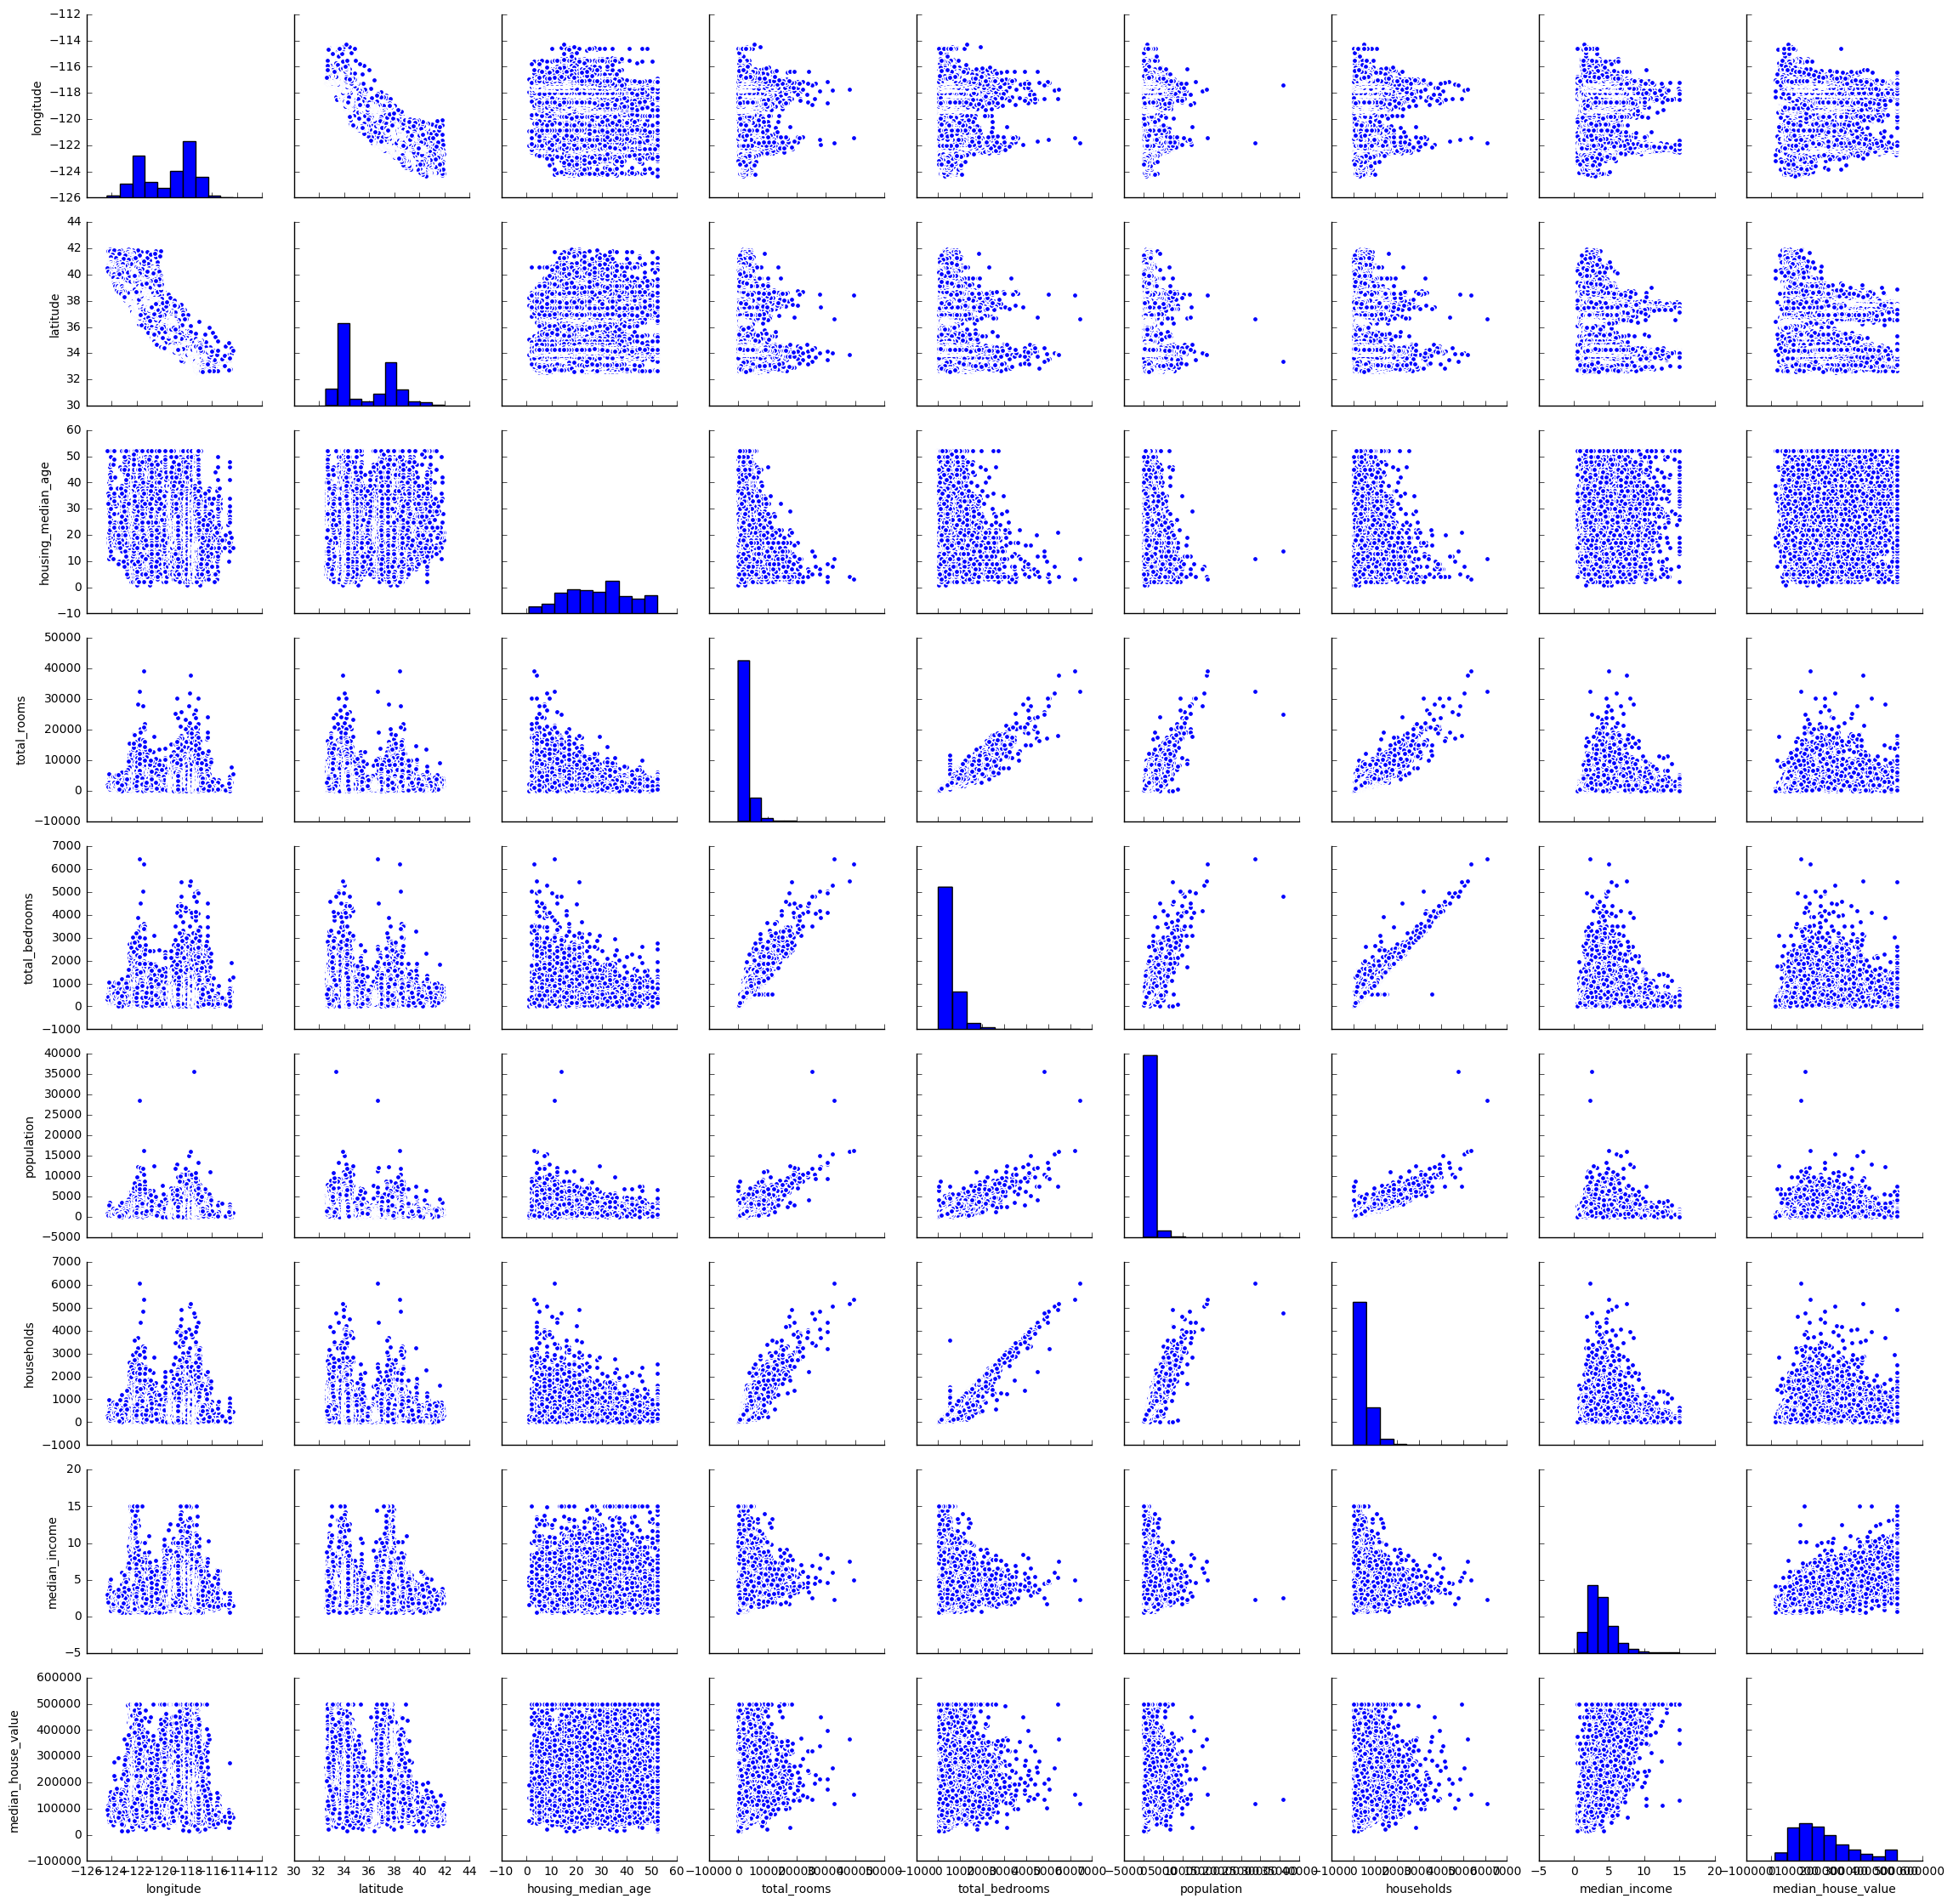

In [13]:
#To see how two varibles are correlated in housing data
sns.pairplot(housing_df)
plt.show()

#### 3.Encode categorical data

In [14]:
#Convert categorical column in the dataset to numerical data .
#Create new dataset with newly Cocverted categorical columns 
housing_df1 = pd.get_dummies(housing_df, columns = ['ocean_proximity'], drop_first = True)
#make a copy of data set for later use
housing_df2 = housing_df1.copy()
#To view first five rows of the dataset
housing_df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,1.0,0.0


#### 4.Split the dataset

In [15]:
#Split the data into 80% training dataset and 20% test dataset.
# Import necessary module
from sklearn.model_selection import train_test_split

y = housing_df1['median_house_value'].values
X = housing_df1.drop('median_house_value',axis=1).values
# Reshape Y_train
y = y.reshape(-1,1)
#Split the hoousing data into 80% training dataset and 20% test dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


#### 5.Standardize data

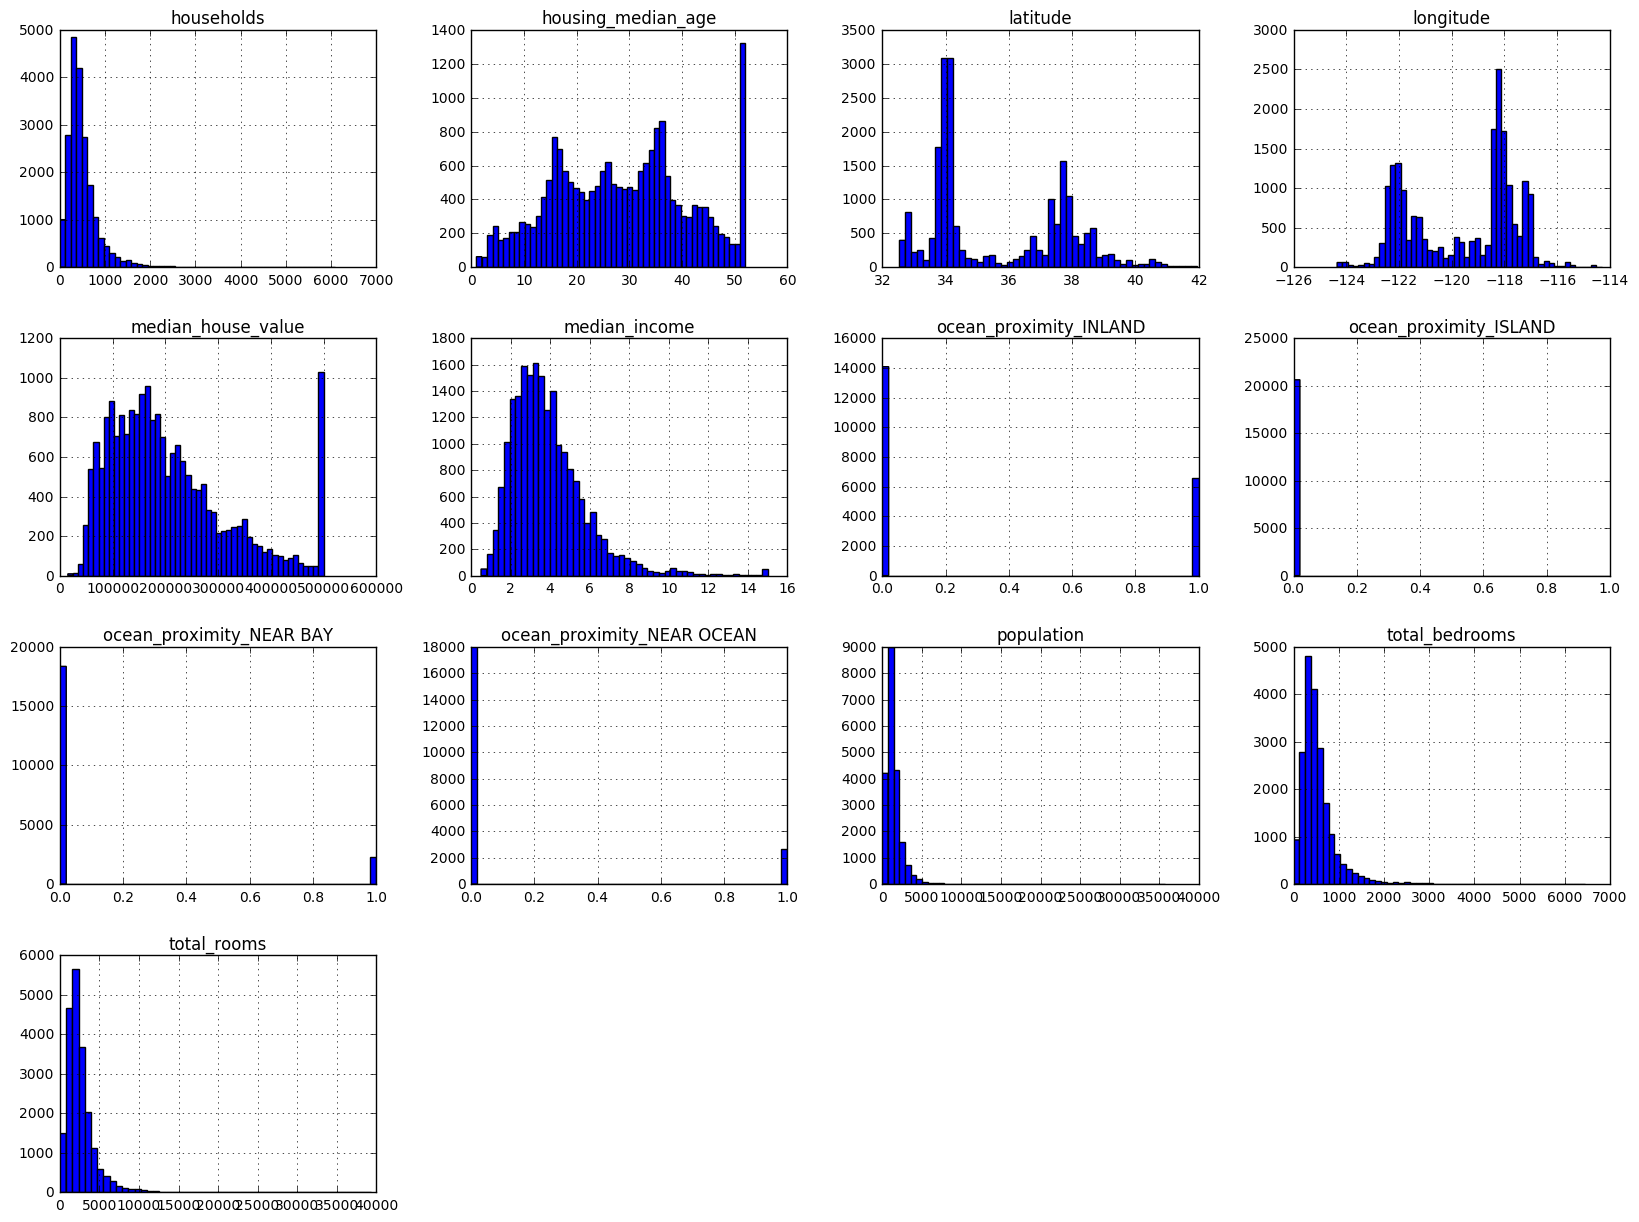

In [16]:
#Standardize training and test datasets.

#To visualize housing data distribution
housing_df1.hist(bins=50, figsize=(20,15))
plt.show()



We can observe below notes from Histograms

- The median_income not in US dollars like median_house_value
- These features have different scales


In [17]:

# Import necessary module to standardize features
from sklearn.preprocessing import StandardScaler

#Fit and transform the scaler using available training and testing data
sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#If not standardize Y_train and Y_test data then there is possibilty of getting high RMSE value.
#Y_train = sc.fit_transform(Y_train)
#Y_test = sc.fit_transform(Y_test)




#### 6.Perform Linear Regression

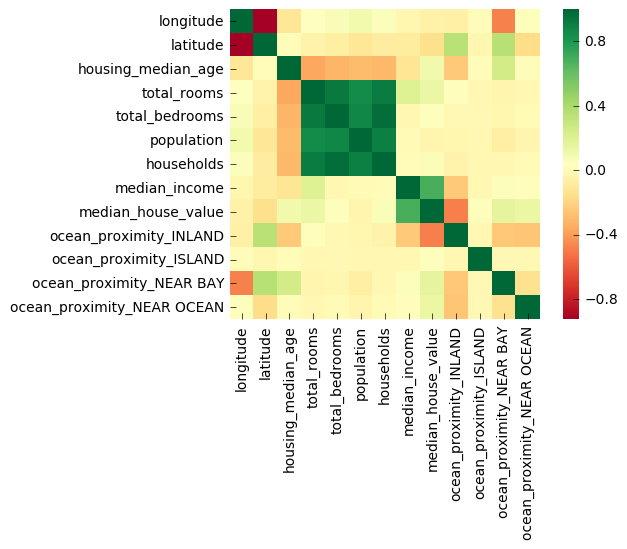

In [18]:
# To explore correlation between lable and features.
sns.heatmap(housing_df1.corr(), square=True, cmap='RdYlGn')


- Median_income is strongly correlated with the mediam_house_value, people earn more money is likely to live in more expensive districts
- There is a negative corretaliton between ocean_proximity_ISLAND and median_house_value, this means that house or districts that are near/in islands are less expensive.


In [19]:
#Perform Linear Regression on training data.

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,Y_train)

#Predict output for test dataset using the fitted model.
y_pred = reg_all.predict(X_test)
#print("Predict output for test dataset: {}".format(y_pred))
print("R^2: {}".format(reg_all.score(X_test, Y_test)))
#Print root mean squared error (RMSE) from Linear Regression.
#rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
#print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6250105991672369


#### 7.Perform Decision Tree Regression

In [20]:
#import required module to split dataset
from sklearn.model_selection import train_test_split

# Prepare data for training DecisionTreeRegressor and RandomForestRegresso models
labels = housing_df2.pop('median_house_value')
x_train, x_test, y_train, y_test = train_test_split(housing_df2, labels, test_size=0.2,random_state=42)


In [23]:
# Import the DecisionTreeRegressor module
from sklearn.tree import DecisionTreeRegressor

# Instantiate model
dt = DecisionTreeRegressor( max_depth=10,random_state=42)

# Train the model on training data
dt_fit = dt.fit(x_train, y_train)

#Predict output for test dataset using the fitted model.
y_predicted2  = dt_fit.predict(x_test)


print("R^2: {}".format(dt_fit.score(x_test, y_test)))

#Print root mean squared error from Decision Tree Regression.
#rmse = np.sqrt(mean_squared_error(y_test,y_predicted2))
#print("Root Mean Squared Error: {}".format(rmse))



R^2: 0.7124079431220236


#### 8.Perform Random Forest Regression

In [24]:
# Import the RandomForestRegressor module
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)

# Train the model on training data
rf.fit(x_train, y_train);

#Predict output for test dataset using the fitted model.
y_predicted3 = rf.predict(x_test)

print("R^2: {}".format(rf.score(x_test, y_test)))

#Print root mean squared error (RMSE) from Linear Regression.
#rmse = np.sqrt(mean_squared_error(y_test,y_predicted3))
#print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8190055928255107
